In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from scipy import signal
from scipy.interpolate import *
from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Lectura de los archivos donde estan los valores de corriente y voltaje a determinada temperatura
c_in0 = []
v_in0 = []
with open("/home/juan/Documentos/1350CS/0.txt", "r") as f:
    for line in f:
        c_in0.append(line.split()[4])
        v_in0.append(line.split()[3])
v0=np.asfarray(v_in0[1:-1])
c0=np.asfarray(c_in0[1:-1])


In [3]:
c_in5 = []
v_in5 = []
with open("/home/juan/Documentos/1350CS/5.txt", "r") as f:
    for line in f:
        c_in5.append(line.split()[4])
        v_in5.append(line.split()[3])
v5=np.asfarray(v_in5[1:-1])
c5=np.asfarray(c_in5[1:-1])

In [4]:
c_in10 = []
v_in10 = []
with open("/home/juan/Documentos/1350CS/10.txt", "r") as f:
    for line in f:
        c_in10.append(line.split()[4])
        v_in10.append(line.split()[3])
v10=np.asfarray(v_in10[1:-1])
c10=np.asfarray(c_in10[1:-1])

In [5]:
c_in15 = []
v_in15 = []
with open("/home/juan/Documentos/1350CS/15.txt", "r") as f:
    for line in f:
        c_in15.append(line.split()[4])
        v_in15.append(line.split()[3])
v15=np.asfarray(v_in15[1:-1])
c15=np.asfarray(c_in15[1:-1])

In [6]:
c_in20 = []
v_in20 = []
with open("/home/juan/Documentos/1350CS/20.txt", "r") as f:
    for line in f:
        c_in20.append(line.split()[3])
        v_in20.append(line.split()[2])
v20=np.asfarray(v_in20[1:-1])
c20=np.asfarray(c_in20[1:-1])

In [7]:
c_in25 = []
v_in25 = []
with open("/home/juan/Documentos/1350CS/25.txt", "r") as f:
    for line in f:
        c_in25.append(line.split()[3])
        v_in25.append(line.split()[2])
v25=np.asfarray(v_in25[1:-1])
c25=np.asfarray(c_in25[1:-1])

In [8]:
c_in30 = []
v_in30 = []
with open("/home/juan/Documentos/1350CS/30.txt", "r") as f:
    for line in f:
        c_in30.append(line.split()[3])
        v_in30.append(line.split()[2])
v30=np.asfarray(v_in30[1:-1])
c30=np.asfarray(c_in30[1:-1])

In [9]:
c_in35 = []
v_in35 = []
with open("/home/juan/Documentos/1350CS/35.txt", "r") as f:
    for line in f:
        c_in35.append(line.split()[3])
        v_in35.append(line.split()[2])
v35=np.asfarray(v_in35[1:-1])
c35=np.asfarray(c_in35[1:-1])

In [10]:
c_in40 = []
v_in40 = []
with open("/home/juan/Documentos/1350CS/40.txt", "r") as f:
    for line in f:
        c_in40.append(line.split()[3])
        v_in40.append(line.split()[2])
v40=np.asfarray(v_in40[1:-1])
c40=np.asfarray(c_in40[1:-1])

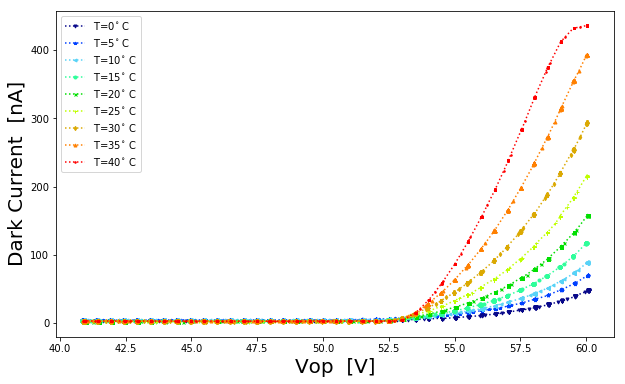

In [11]:
# Gráfica de corriente oscura en función del voltaje de polarizacion para diferentes temperaturas (sin procesado)
fig, axes = plt.subplots()
fig.set_size_inches(10,6)
axes.plot(v0,c0 , color='#08088A', linestyle='dotted', marker='v', markersize=3, label="T=0$^{\circ}$ C")
axes.plot(v5,c5 , color='#0040FF', linestyle='dotted', marker='*', markersize=3, label="T=5$^{\circ}$ C")
axes.plot(v10,c10 , color='#58D3F7', linestyle='dotted', marker='<', markersize=3, label="T=10$^{\circ}$ C")
axes.plot(v15,c15 , color='#2EFE9A', linestyle='dotted', marker='o', markersize=3, label="T=15$^{\circ}$ C")
axes.plot(v20,c20 , color='#01DF01', linestyle='dotted', marker='x', markersize=3, label="T=20$^{\circ}$ C")
axes.plot(v25,c25 , color='#BFFF00', linestyle='dotted', marker='+', markersize=3, label="T=25$^{\circ}$ C")
axes.plot(v30,c30 , color='#DBA901', linestyle='dotted', marker='d', markersize=3, label="T=30$^{\circ}$ C")
axes.plot(v35,c35 , color='#FF8000', linestyle='dotted', marker='^', markersize=3, label="T=35$^{\circ}$ C")
axes.plot(v40,c40 , color='#FF0000', linestyle='dotted', marker='.', markersize=3, label="T=40$^{\circ}$ C")
axes.legend()
axes.set_xlabel("Vop  [V]", fontsize=20)
axes.set_ylabel("Dark Current  [nA]", fontsize=20)
fig.savefig("Dark_current_vs_Vop3.png")

In [12]:
# Esta sección permite obtener un único valor de corriente para cada punto de voltaje 
### v0
v=v0
cf=c0
v0_temp=[]
c0_temp=[]
v0_new=[]
c0_new=[]
std=[] ## desviación estandar de  las muestras
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if (dv < 0.2):
        v0_temp.append(v[i])
        c0_temp.append(cf[i])
    elif len(v0_temp)==0:
        v0_new.append(v[i])
        c0_new.append(cf[i])
        v0_temp=[]
        c0_temp=[]
    else:       
        v0_new.append(np.mean(np.asarray(v0_temp)))
        c0_new.append(np.mean(np.asarray(c0_temp)))
        std.append(np.std(np.asarray(v0_temp)))
        v0_temp=[]
        c0_temp=[]
std.append(np.std(np.asarray(v0_temp)))
v0_new.append(np.mean(np.asarray(v0_temp)))
c0_new.append(np.mean(np.asarray(c0_temp)))
v0_temp=[]
c0_temp=[]
        
### v5
v=v5
cf=c5
v5_temp=[]
c5_temp=[]
v5_new=[]
c5_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v5_temp.append(v[i])
        c5_temp.append(cf[i])
    elif len(v5_temp)==0:
        v5_new.append(v[i])
        c5_new.append(cf[i])
        v5_temp=[]
        c5_temp=[]
    else:       
        v5_new.append(np.mean(np.asarray(v5_temp)))
        c5_new.append(np.mean(np.asarray(c5_temp)))
        v5_temp=[]
        c5_temp=[]
v5_new.append(np.mean(np.asarray(v5_temp)))
c5_new.append(np.mean(np.asarray(c5_temp)))
v5_temp=[]
c5_temp=[]        
        
### v10
v=v10
cf=c10
v10_temp=[]
c10_temp=[]
v10_new=[]
c10_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v10_temp.append(v[i])
        c10_temp.append(cf[i])
    elif len(v10_temp)==0:
        v10_new.append(v[i])
        c10_new.append(cf[i])
        v10_temp=[]
        c10_temp=[]
    else:       
        v10_new.append(np.mean(np.asarray(v10_temp)))
        c10_new.append(np.mean(np.asarray(c10_temp)))
        v10_temp=[]
        c10_temp=[]
v10_new.append(np.mean(np.asarray(v10_temp)))
c10_new.append(np.mean(np.asarray(c10_temp)))
v10_temp=[]
c10_temp=[]
### v15
v=v15
cf=c15
v15_temp=[]
c15_temp=[]
v15_new=[]
c15_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v15_temp.append(v[i])
        c15_temp.append(cf[i])
    elif len(v15_temp)==0:
        v15_new.append(v[i])
        c15_new.append(cf[i])
        v15_temp=[]
        c15_temp=[]
    else:       
        v15_new.append(np.mean(np.asarray(v15_temp)))
        c15_new.append(np.mean(np.asarray(c15_temp)))
        v15_temp=[]
        c15_temp=[]
v15_new.append(np.mean(np.asarray(v15_temp)))
c15_new.append(np.mean(np.asarray(c15_temp)))
v15_temp=[]
c15_temp=[]

### v20
v=v20
cf=c20
v20_temp=[]
c20_temp=[]
v20_new=[]
c20_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v20_temp.append(v[i])
        c20_temp.append(cf[i])
    elif len(v20_temp)==0:
        v20_new.append(v[i])
        c20_new.append(cf[i])
        v20_temp=[]
        c20_temp=[]
    else:       
        v20_new.append(np.mean(np.asarray(v20_temp)))
        c20_new.append(np.mean(np.asarray(c20_temp)))
        v20_temp=[]
        c20_temp=[]
v20_new.append(np.mean(np.asarray(v20_temp)))
c20_new.append(np.mean(np.asarray(c20_temp)))
v20_temp=[]
c20_temp=[]
### v25
v=v25
cf=c25
v25_temp=[]
c25_temp=[]
v25_new=[]
c25_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v25_temp.append(v[i])
        c25_temp.append(cf[i])
    elif len(v25_temp)==0:
        v25_new.append(v[i])
        c25_new.append(cf[i])
        v25_temp=[]
        c25_temp=[]
    else:       
        v25_new.append(np.mean(np.asarray(v25_temp)))
        c25_new.append(np.mean(np.asarray(c25_temp)))
        v25_temp=[]
        c25_temp=[]
v25_new.append(np.mean(np.asarray(v25_temp)))
c25_new.append(np.mean(np.asarray(c25_temp)))
v25_temp=[]
c25_temp=[]
### v30
v=v30
cf=c30
v30_temp=[]
c30_temp=[]
v30_new=[]
c30_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v30_temp.append(v[i])
        c30_temp.append(cf[i])
    elif len(v30_temp)==0:
        v30_new.append(v[i])
        c30_new.append(cf[i])
        v30_temp=[]
        c30_temp=[]
    else:       
        v30_new.append(np.mean(np.asarray(v30_temp)))
        c30_new.append(np.mean(np.asarray(c30_temp)))
        v30_temp=[]
        c30_temp=[]
v30_new.append(np.mean(np.asarray(v30_temp)))
c30_new.append(np.mean(np.asarray(c30_temp)))
v30_temp=[]
c30_temp=[]

### v35
v=v35
cf=c35
v35_temp=[]
c35_temp=[]
v35_new=[]
c35_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if dv < 0.2:
        v35_temp.append(v[i])
        c35_temp.append(cf[i])
    elif len(v35_temp)==0:
        v35_new.append(v[i])
        c35_new.append(cf[i])
        v35_temp=[]
        c35_temp=[]
    else:       
        v35_new.append(np.mean(np.asarray(v35_temp)))
        c35_new.append(np.mean(np.asarray(c35_temp)))
        v35_temp=[]
        c35_temp=[]
v35_new.append(np.mean(np.asarray(v35_temp)))
c35_new.append(np.mean(np.asarray(c35_temp)))
v35_temp=[]
c35_temp=[]
        
### v40
v=v40
cf=c40
v40_temp=[]
c40_temp=[]
v40_new=[]
c40_new=[]
for i in range(0, len(v)-1):
    dv=abs(v[i+1]-v[i])
    if (dv < 0.3):
        v40_temp.append(v[i])
        c40_temp.append(cf[i])
    elif len(v40_temp)==0:
        v40_new.append(v[i])
        c40_new.append(cf[i])
        v40_temp=[]
        c40_temp=[]
    else:       
        v40_new.append(np.mean(np.asarray(v40_temp)))
        c40_new.append(np.mean(np.asarray(c40_temp)))
        v40_temp=[]
        c40_temp=[]
v40_new.append(np.mean(np.asarray(v40_temp)))
c40_new.append(np.mean(np.asarray(c40_temp)))
v40_temp=[]
c40_temp=[]


        

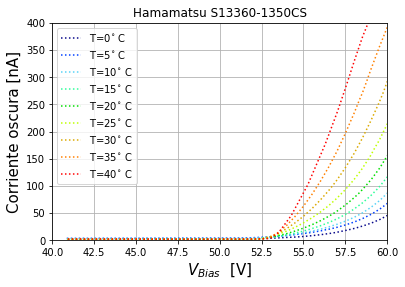

In [32]:
# Nueva grfica 
fig, axes = plt.subplots()
axes.plot(v0_new,c0_new , color='#08088A', linestyle='dotted', marker='v', markersize=0, label="T=0$^{\circ}$ C")
axes.plot(v5_new,c5_new , color='#0040FF', linestyle='dotted', marker='*', markersize=0, label="T=5$^{\circ}$ C")
axes.plot(v10_new,c10_new , color='#58D3F7', linestyle='dotted', marker='<', markersize=0, label="T=10$^{\circ}$ C")
axes.plot(v15_new,c15_new , color='#2EFE9A', linestyle='dotted', marker='o', markersize=0, label="T=15$^{\circ}$ C")
axes.plot(v20_new,c20_new , color='#01DF01', linestyle='dotted', marker='x', markersize=0, label="T=20$^{\circ}$ C")
axes.plot(v25_new,c25_new , color='#BFFF00', linestyle='dotted', marker='+', markersize=0, label="T=25$^{\circ}$ C")
axes.plot(v30_new,c30_new , color='#DBA901', linestyle='dotted', marker='d', markersize=0, label="T=30$^{\circ}$ C")
axes.plot(v35_new,c35_new , color='#FF8000', linestyle='dotted', marker='^', markersize=0, label="T=35$^{\circ}$ C")
axes.plot(v40_new,c40_new , color='#FF0000', linestyle='dotted', marker='.', markersize=0, label="T=40$^{\circ}$ C")
axes.legend()
axes.set_xlabel("$V_{Bias}$  [V]", fontsize=15)
axes.set_ylabel("Corriente oscura [nA]", fontsize=15)
axes.set_ylim(-0,400)
axes.grid(True)
axes.set_title('Hamamatsu S13360-1350CS')
axes.set_xlim(40,60)
fig.savefig("dc_13360.eps")

In [37]:
# En esta sección se encuentra el voltaje de ruptura
v=v0_new
l=np.log(c0_new)
rangeFit=23
rangeFitB=18
p = polyfit(v[len(v)-rangeFit:len(v)-12],l[len(l)-rangeFit:len(l)-12],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr0=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection


In [38]:
v=v5_new
l=np.log(c5_new)
rangeFit=21
rangeFitB=10
p = polyfit(v[len(v)-rangeFit:len(v)-5],l[len(l)-rangeFit:len(l)-5],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr5=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [40]:
v=v10_new
l=np.log(c10_new)
rangeFit=20
rangeFitB=20
p = polyfit(v[len(v)-rangeFit:len(v)-5],l[len(l)-rangeFit:len(l)-5],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr10=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [41]:
v=v15_new
l=np.log(c15_new)
rangeFit=19
rangeFitB=15
p = polyfit(v[len(v)-rangeFit:len(v)-14],l[len(l)-rangeFit:len(l)-14],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr15=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [42]:
v=v20_new
l=np.log(c20_new)
rangeFit=18
rangeFitB=24
p = polyfit(v[len(v)-rangeFit:len(v)-16],l[len(l)-rangeFit:len(l)-16],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr20=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [43]:
v=v25_new
l=np.sqrt(c25_new)
rangeFit=18
rangeFitB=29
p = polyfit(v[len(v)-rangeFit:len(v)-2],l[len(l)-rangeFit:len(l)-2],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr25=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [44]:
v=v30_new
l=np.sqrt(c30_new)
rangeFit=18
rangeFitB=13
p = polyfit(v[len(v)-rangeFit:len(v)-16],l[len(l)-rangeFit:len(l)-16],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr30=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [45]:
v=v35_new
l=np.sqrt(c35_new)
rangeFit=18
rangeFitB=20
p = polyfit(v[len(v)-rangeFit:len(v)-14],l[len(l)-rangeFit:len(l)-14],1) #curve fit
pB = polyfit(v[0:rangeFitB],l[0:rangeFitB],1) # base line fit
vbr35=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

In [46]:
v=v40_new
l=np.sqrt(c40_new)
rangeFit=11
rangeFitB=15
p = polyfit(v[len(v)-rangeFit:len(v)-7],l[len(l)-rangeFit:len(l)-7],1) #curve fit
pB = polyfit(v[6:rangeFitB],l[6:rangeFitB],1) # base line fit
vbr40=(p[1]-pB[1])/(pB[0]-p[0]) # two lines intersection

[  4.17536187e-02   5.12464377e+01]


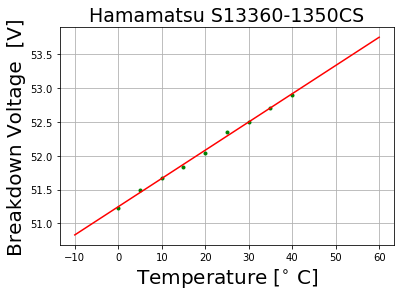

In [47]:
# Gráfica de la dependencia del voltaje de ruptura de la  temperatura
T=[0,5,10,15,20,25,30,35,40]
Vbr=[vbr0,vbr5,vbr10,vbr15,vbr20,vbr25,vbr30,vbr35,vbr40]
Tn=linspace(-10,60,100)
Tr = polyfit(T,Vbr,1)
fig, axes = plt.subplots()
#fig.set_size_inches(17,10)
axes.plot(T, Vbr,linestyle=' ',color='green', marker='.')
axes.plot(Tn, polyval(Tr,Tn), color='red')
axes.set_ylabel("Breakdown Voltage  [V]", fontsize=20)
axes.set_xlabel("Temperature [$^{\circ}$ C]", fontsize=20)
axes.grid(True)
#axes.set_ylim(50,54)
#axes.axhspan()
#savetxt('Vbr_new.txt',Vbr)
print(Tr) # Ecuacion de la recta que define la curva
plt.title('Hamamatsu S13360-1350CS',size=19)
fig.savefig("breakvoltage_vs_T_S13360-1350CS.png")